In [526]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [527]:
df = pd.read_csv("hotel_bookings.csv")

In [528]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [529]:
for col in df.columns:
    print(col)

hotel
is_canceled
lead_time
arrival_date_year
arrival_date_month
arrival_date_week_number
arrival_date_day_of_month
stays_in_weekend_nights
stays_in_week_nights
adults
children
babies
meal
country
market_segment
distribution_channel
is_repeated_guest
previous_cancellations
previous_bookings_not_canceled
reserved_room_type
assigned_room_type
booking_changes
deposit_type
agent
company
days_in_waiting_list
customer_type
adr
required_car_parking_spaces
total_of_special_requests
reservation_status
reservation_status_date


In [530]:
df.drop(columns=['agent', 'company'], inplace=True)
df.dropna(inplace=True)
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [531]:
unique_countries = df['country'].unique()

country_dict = {country: idx for idx, country in enumerate(unique_countries)}

country_dict

{'PRT': 0,
 'GBR': 1,
 'USA': 2,
 'ESP': 3,
 'IRL': 4,
 'FRA': 5,
 'ROU': 6,
 'NOR': 7,
 'OMN': 8,
 'ARG': 9,
 'POL': 10,
 'DEU': 11,
 'BEL': 12,
 'CHE': 13,
 'CN': 14,
 'GRC': 15,
 'ITA': 16,
 'NLD': 17,
 'DNK': 18,
 'RUS': 19,
 'SWE': 20,
 'AUS': 21,
 'EST': 22,
 'CZE': 23,
 'BRA': 24,
 'FIN': 25,
 'MOZ': 26,
 'BWA': 27,
 'LUX': 28,
 'SVN': 29,
 'ALB': 30,
 'IND': 31,
 'CHN': 32,
 'MEX': 33,
 'MAR': 34,
 'UKR': 35,
 'SMR': 36,
 'LVA': 37,
 'PRI': 38,
 'SRB': 39,
 'CHL': 40,
 'AUT': 41,
 'BLR': 42,
 'LTU': 43,
 'TUR': 44,
 'ZAF': 45,
 'AGO': 46,
 'ISR': 47,
 'CYM': 48,
 'ZMB': 49,
 'CPV': 50,
 'ZWE': 51,
 'DZA': 52,
 'KOR': 53,
 'CRI': 54,
 'HUN': 55,
 'ARE': 56,
 'TUN': 57,
 'JAM': 58,
 'HRV': 59,
 'HKG': 60,
 'IRN': 61,
 'GEO': 62,
 'AND': 63,
 'GIB': 64,
 'URY': 65,
 'JEY': 66,
 'CAF': 67,
 'CYP': 68,
 'COL': 69,
 'GGY': 70,
 'KWT': 71,
 'NGA': 72,
 'MDV': 73,
 'VEN': 74,
 'SVK': 75,
 'FJI': 76,
 'KAZ': 77,
 'PAK': 78,
 'IDN': 79,
 'LBN': 80,
 'PHL': 81,
 'SEN': 82,
 'SYC': 83,
 'A

In [532]:
month_to_number = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}

df['arrival_date_month'] = df['arrival_date_month'].map(month_to_number)
df['country'] = df['country'].map(country_dict)

df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,7,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,7,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,7,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,7,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,7,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [533]:
df[['reservation_status_year', 'reservation_status_month', 'reservation_status_day']] = df['reservation_status_date'].str.split('-', expand=True)

df[['reservation_status_year', 'reservation_status_month', 'reservation_status_day']] = df[['reservation_status_year', 'reservation_status_month', 'reservation_status_day']].apply(pd.to_numeric)

df.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,reservation_status_year,reservation_status_month,reservation_status_day
0,Resort Hotel,0,342,2015,7,27,1,0,0,2,...,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015,7,1
1,Resort Hotel,0,737,2015,7,27,1,0,0,2,...,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015,7,1
2,Resort Hotel,0,7,2015,7,27,1,0,1,1,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015,7,2
3,Resort Hotel,0,13,2015,7,27,1,0,1,1,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015,7,2
4,Resort Hotel,0,14,2015,7,27,1,0,2,2,...,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015,7,3


In [534]:
hotel_type = {'City Hotel': 0, 'Resort Hotel': 1}

df['hotel'] = df['hotel'].map(hotel_type)

df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,reservation_status_year,reservation_status_month,reservation_status_day
0,1,0,342,2015,7,27,1,0,0,2,...,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015,7,1
1,1,0,737,2015,7,27,1,0,0,2,...,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015,7,1
2,1,0,7,2015,7,27,1,0,1,1,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015,7,2
3,1,0,13,2015,7,27,1,0,1,1,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015,7,2
4,1,0,14,2015,7,27,1,0,2,2,...,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015,7,3


In [535]:
df.drop(columns=['reservation_status_date'], inplace=True)

df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_year,reservation_status_month,reservation_status_day
0,1,0,342,2015,7,27,1,0,0,2,...,No Deposit,0,Transient,0.0,0,0,Check-Out,2015,7,1
1,1,0,737,2015,7,27,1,0,0,2,...,No Deposit,0,Transient,0.0,0,0,Check-Out,2015,7,1
2,1,0,7,2015,7,27,1,0,1,1,...,No Deposit,0,Transient,75.0,0,0,Check-Out,2015,7,2
3,1,0,13,2015,7,27,1,0,1,1,...,No Deposit,0,Transient,75.0,0,0,Check-Out,2015,7,2
4,1,0,14,2015,7,27,1,0,2,2,...,No Deposit,0,Transient,98.0,0,1,Check-Out,2015,7,3


In [536]:
df = pd.get_dummies(df, columns=['meal', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status'])



In [537]:
df = df.astype(int)

In [538]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reservation_status_Canceled,reservation_status_Check-Out,reservation_status_No-Show
0,1,0,342,2015,7,27,1,0,0,2,...,1,0,0,0,0,1,0,0,1,0
1,1,0,737,2015,7,27,1,0,0,2,...,1,0,0,0,0,1,0,0,1,0
2,1,0,7,2015,7,27,1,0,1,1,...,1,0,0,0,0,1,0,0,1,0
3,1,0,13,2015,7,27,1,0,1,1,...,1,0,0,0,0,1,0,0,1,0
4,1,0,14,2015,7,27,1,0,2,2,...,1,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,0,23,2017,8,35,30,2,5,2,...,1,0,0,0,0,1,0,0,1,0
119386,0,0,102,2017,8,35,31,2,5,3,...,1,0,0,0,0,1,0,0,1,0
119387,0,0,34,2017,8,35,31,2,5,2,...,1,0,0,0,0,1,0,0,1,0
119388,0,0,109,2017,8,35,31,2,5,2,...,1,0,0,0,0,1,0,0,1,0


In [539]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reservation_status_Canceled,reservation_status_Check-Out,reservation_status_No-Show
0,1,0,342,2015,7,27,1,0,0,2,...,1,0,0,0,0,1,0,0,1,0
1,1,0,737,2015,7,27,1,0,0,2,...,1,0,0,0,0,1,0,0,1,0
2,1,0,7,2015,7,27,1,0,1,1,...,1,0,0,0,0,1,0,0,1,0
3,1,0,13,2015,7,27,1,0,1,1,...,1,0,0,0,0,1,0,0,1,0
4,1,0,14,2015,7,27,1,0,2,2,...,1,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,0,23,2017,8,35,30,2,5,2,...,1,0,0,0,0,1,0,0,1,0
119386,0,0,102,2017,8,35,31,2,5,3,...,1,0,0,0,0,1,0,0,1,0
119387,0,0,34,2017,8,35,31,2,5,2,...,1,0,0,0,0,1,0,0,1,0
119388,0,0,109,2017,8,35,31,2,5,2,...,1,0,0,0,0,1,0,0,1,0


In [540]:
X = df.drop(columns = ['is_canceled'])

In [541]:
Y = df['is_canceled']

In [542]:
X

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reservation_status_Canceled,reservation_status_Check-Out,reservation_status_No-Show
0,1,342,2015,7,27,1,0,0,2,0,...,1,0,0,0,0,1,0,0,1,0
1,1,737,2015,7,27,1,0,0,2,0,...,1,0,0,0,0,1,0,0,1,0
2,1,7,2015,7,27,1,0,1,1,0,...,1,0,0,0,0,1,0,0,1,0
3,1,13,2015,7,27,1,0,1,1,0,...,1,0,0,0,0,1,0,0,1,0
4,1,14,2015,7,27,1,0,2,2,0,...,1,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,2017,8,35,30,2,5,2,0,...,1,0,0,0,0,1,0,0,1,0
119386,0,102,2017,8,35,31,2,5,3,0,...,1,0,0,0,0,1,0,0,1,0
119387,0,34,2017,8,35,31,2,5,2,0,...,1,0,0,0,0,1,0,0,1,0
119388,0,109,2017,8,35,31,2,5,2,0,...,1,0,0,0,0,1,0,0,1,0


In [543]:
Y

0         0
1         0
2         0
3         0
4         0
         ..
119385    0
119386    0
119387    0
119388    0
119389    0
Name: is_canceled, Length: 118898, dtype: int64

In [544]:
Y.unique()

array([0, 1])

In [545]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2,stratify=Y, random_state = 0)

In [546]:
print("X_train", X_train.shape)
print("X_test", X_test.shape)
print("y_train", Y_train.shape)
print("y_test", Y_test.shape)

X_train (95118, 72)
X_test (23780, 72)
y_train (95118,)
y_test (23780,)


In [547]:
from sklearn import tree

In [548]:
clf = tree.DecisionTreeClassifier()

In [549]:
clf

DecisionTreeClassifier()

In [550]:
clf = clf.fit(X_train, Y_train)

In [551]:
clf

DecisionTreeClassifier()

In [552]:
predicted = clf.score(X_test, Y_test)

In [553]:
predicted

1.0

In [554]:
predicted = clf.predict(X_test)

In [555]:
predicted

array([1, 1, 0, ..., 0, 0, 0])

In [556]:
Y_test

45842     1
8621      1
113646    0
85176     0
115592    0
         ..
109299    0
56944     1
107056    0
35143     0
32664     0
Name: is_canceled, Length: 23780, dtype: int64

In [557]:
clf.score(X_test, Y_test)

1.0

In [558]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reservation_status_Canceled,reservation_status_Check-Out,reservation_status_No-Show
0,1,0,342,2015,7,27,1,0,0,2,...,1,0,0,0,0,1,0,0,1,0
1,1,0,737,2015,7,27,1,0,0,2,...,1,0,0,0,0,1,0,0,1,0
2,1,0,7,2015,7,27,1,0,1,1,...,1,0,0,0,0,1,0,0,1,0
3,1,0,13,2015,7,27,1,0,1,1,...,1,0,0,0,0,1,0,0,1,0
4,1,0,14,2015,7,27,1,0,2,2,...,1,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,0,23,2017,8,35,30,2,5,2,...,1,0,0,0,0,1,0,0,1,0
119386,0,0,102,2017,8,35,31,2,5,3,...,1,0,0,0,0,1,0,0,1,0
119387,0,0,34,2017,8,35,31,2,5,2,...,1,0,0,0,0,1,0,0,1,0
119388,0,0,109,2017,8,35,31,2,5,2,...,1,0,0,0,0,1,0,0,1,0


In [559]:
clf.score(X_test, Y_test)

1.0

In [560]:
predicted

array([1, 1, 0, ..., 0, 0, 0])

In [561]:
rf = RandomForestClassifier()

In [562]:
from sklearn.ensemble import RandomForestClassifier

In [563]:
rf = RandomForestClassifier()

In [564]:
rf

RandomForestClassifier()

In [565]:
rf = rf.fit(X_train, Y_train)

In [566]:
predicted2 = rf.predict(X_test)

In [567]:
predicted2

array([1, 1, 0, ..., 0, 0, 0])

In [568]:
rf.score(X_test, Y_test)

1.0

In [569]:
predicted2

array([1, 1, 0, ..., 0, 0, 0])

In [570]:
fi = clf.feature_importances_

In [571]:
fi = pd.Series(data = fi, index = X.columns)
fi.sort_values(ascending=False, inplace=True)

/var/folders/9s/hdx122ms25q_295bs44h9ryr0000gn/T/ipykernel_6237/1700487969.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')


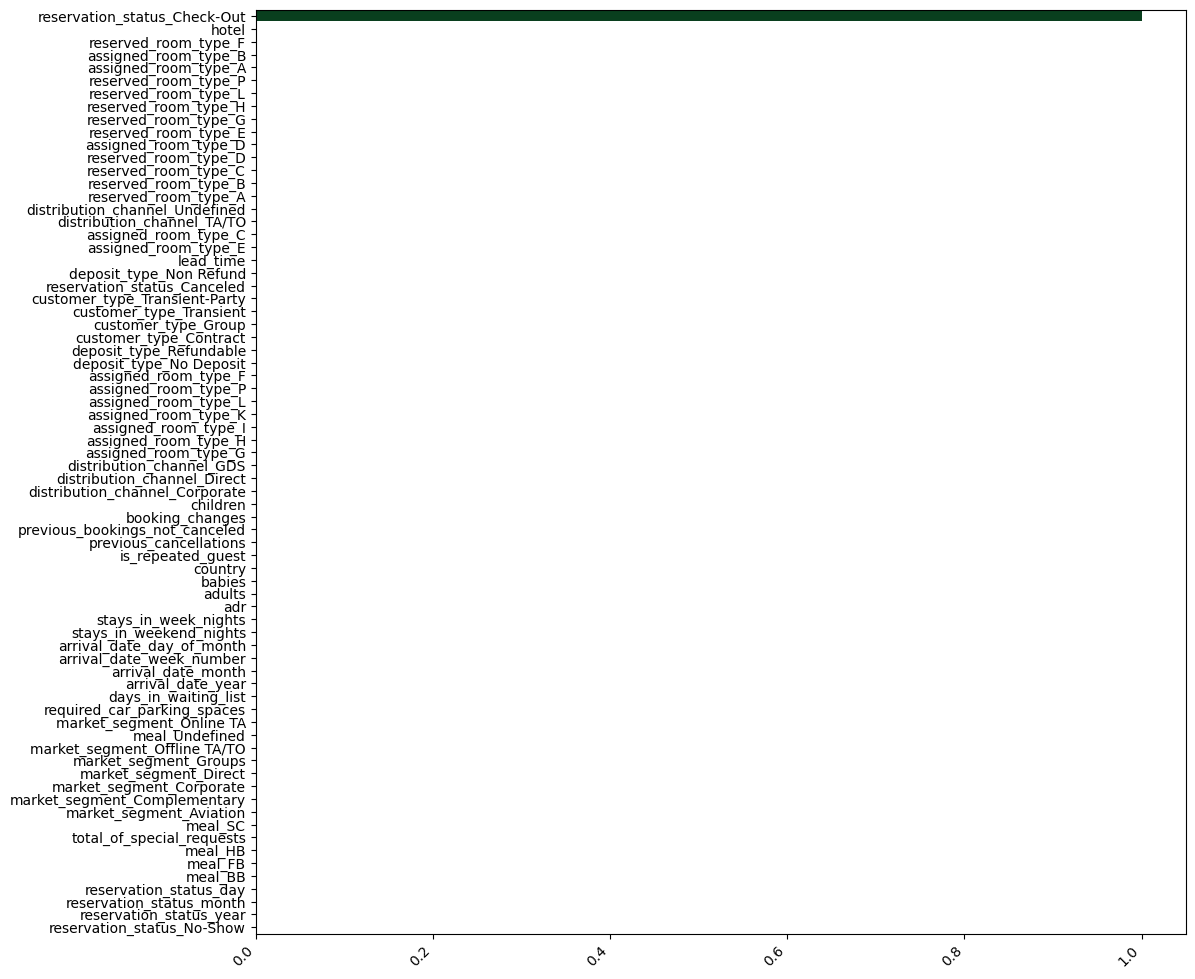

In [580]:
plt.figure(figsize=(12, 12))
chart = sns.barplot(x=fi, y=fi.index, palette=sns.color_palette("BuGn_r", n_colors=len(fi)))
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

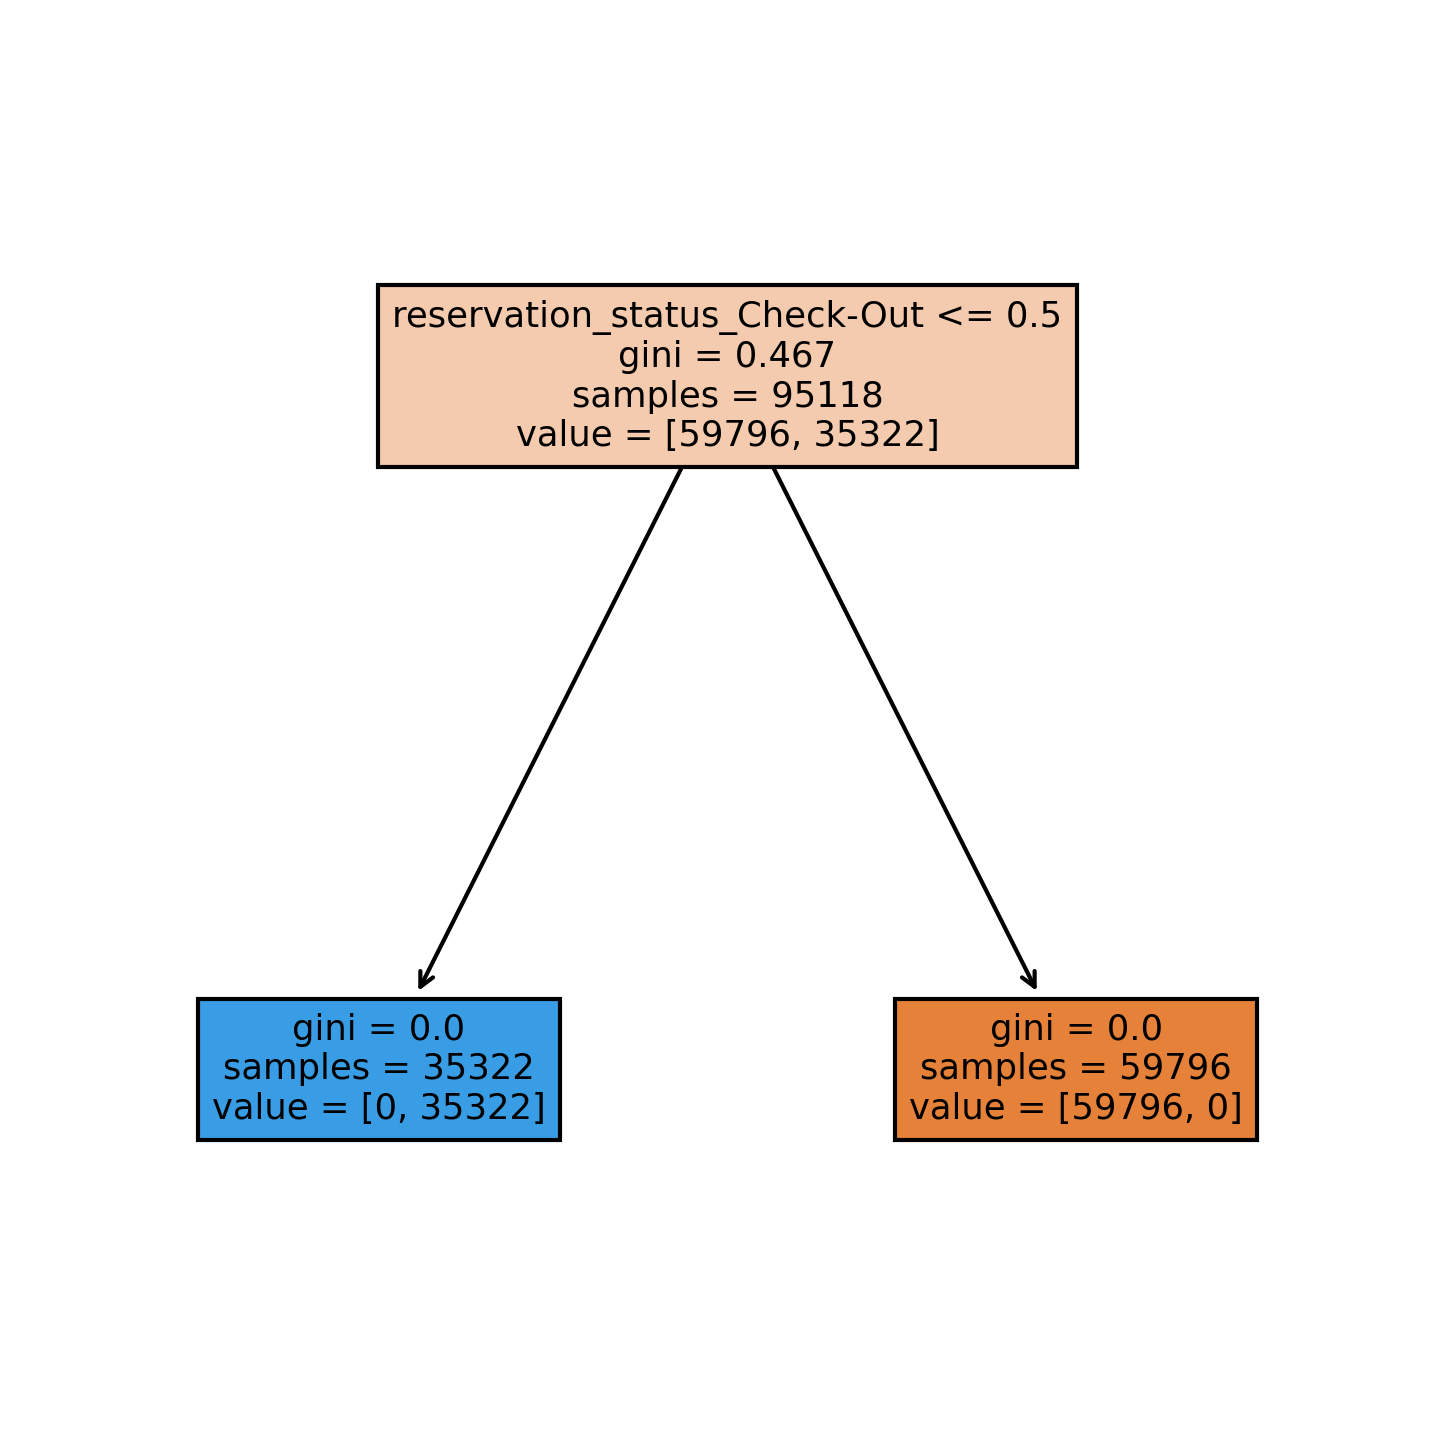

In [579]:
fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (6,6), dpi=300)
tree.plot_tree(clf, max_depth = 5, feature_names = X.columns.tolist(), filled=True)
plt.show()


In [582]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [583]:
accuracy_score(Y_test, predicted)

1.0

In [584]:
print(classification_report(Y_test, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14949
           1       1.00      1.00      1.00      8831

    accuracy                           1.00     23780
   macro avg       1.00      1.00      1.00     23780
weighted avg       1.00      1.00      1.00     23780



In [585]:
accuracy_score(Y_test, predicted2)

1.0

In [586]:
print(classification_report(Y_test, predicted2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14949
           1       1.00      1.00      1.00      8831

    accuracy                           1.00     23780
   macro avg       1.00      1.00      1.00     23780
weighted avg       1.00      1.00      1.00     23780

